City Shanghai is in country China


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


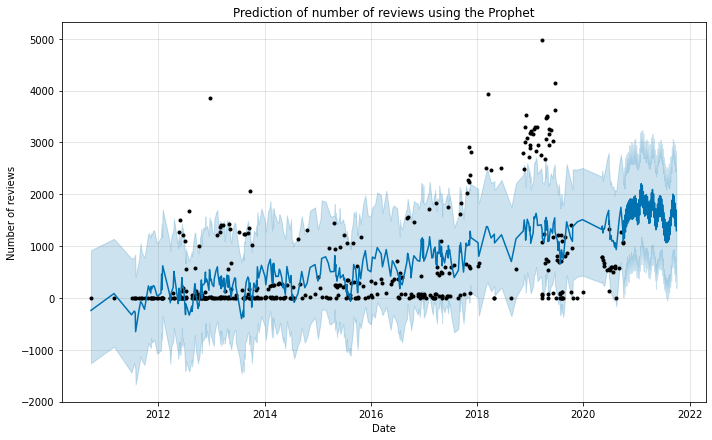

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import airbnb_dataset as ad
from fbprophet import Prophet

AD = ad.AirbnbDataset()
city = 'Shanghai'
df, dfo = AD.get_reviews_for_city(city, per_month = False, per_week = True)
df = df.reset_index(drop = False)
df['index'] = df.index
df['date'] =dfo
r = df[df.year == 2020].index.tolist()[0] 
train = df[:r]

train = train[["date","size"]]
train = train.rename(columns = {"date":"ds","size":"y"})
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)
# future.tail()
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of number of reviews using the Prophet")
plt.xlabel("Date")
plt.ylabel("Number of reviews")
plt.show()
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# fig1 = m.plot(forecast)
# fig2 = m.plot_components(forecast)

# data
# dfo
# r = df[df.year == 2020].index.tolist()[0] 
# x1 = df[:r]
# print(x1.shape)
# x2 = df[r:]
# print(x2.shape)
# x1.plot(figsize=(30,15))

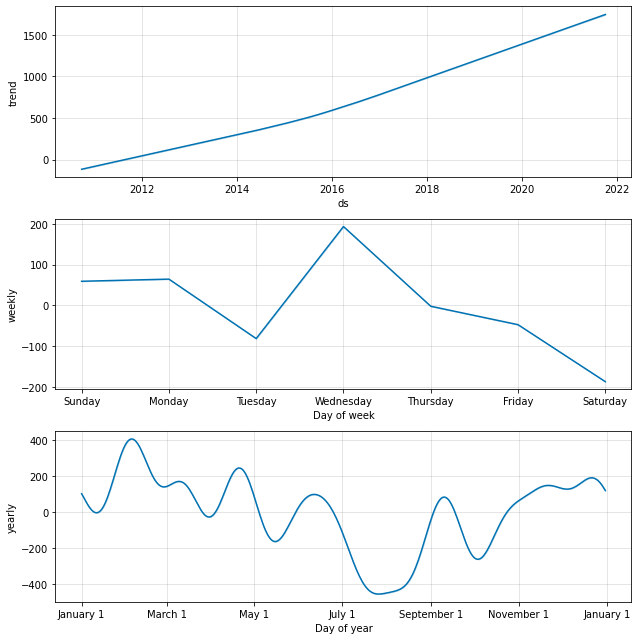

In [24]:
m.plot_components(prediction)
plt.show()

In [33]:
df[410:414]

,year,week,size
410,2019,50,3026
411,2019,51,3624
412,2019,52,4151
413,2020,1,2642


In [34]:
!pip install fbprophet --user

     |████████████████████████████████| 64 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 67.3 MB 76.8 MB/s eta 0:00:01    |█▌                              | 3.1 MB 11.8 MB/s eta 0:00:06
     |████████████████████████████████| 45 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 114 kB 58.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 732 kB 33.5 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python3.7 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-5g3o8xwr/fbprophet/setup.py'"'"'; __file__='"'"'/tmp/pip-install-5g3o8xwr/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-9mylzppj
       cwd: /tmp/pip-install-5g3o8xwr/fbprophet/
  Complete

In [35]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from fbprophet import Prophet

# train1 = df['year']
x_train = x1['index']
y_train = x1['size']
# print(x_test)
# print(x_train)
x_test = x2['index']
y_test = x2['size']
# print(y_test)
# print(y_train)
# x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)
# print(x_train.shape)
# print(y_train.shape)
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
# print(x_train.shape)
# print(y_train.shape)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
# print(x_test.shape)
# print(y_test.shape)

# x_train
# print(x_train[1])

model=sm.tsa.statespace.SARIMAX(x_train, y_train, order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

ModuleNotFoundError: No module named 'fbprophet'

In [28]:
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

/home/x5he/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0710452556418415

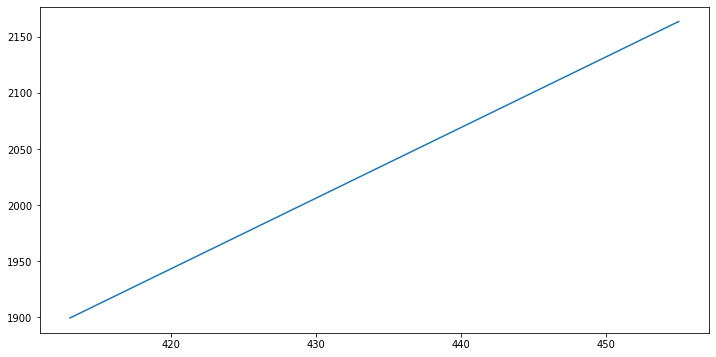

In [29]:
y_pred = reg.predict(x_test)


plt.figure(figsize=(12, 6))
plt.plot(x_test, y_pred, label= 'Set dev train')

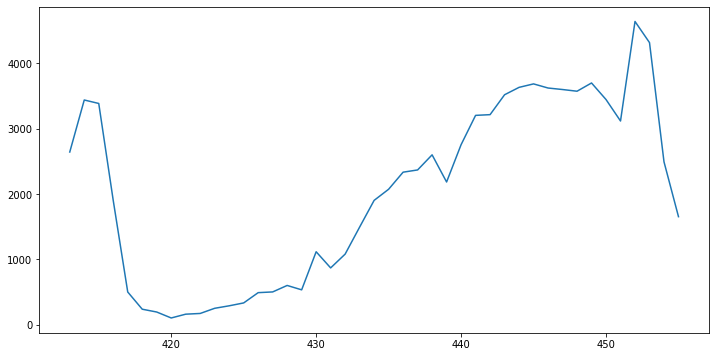

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(x_test, y_test, label= 'Set dev train')

In [24]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [25]:
clf.fit(x_train, y_train)

/home/x5he/.local/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
clf.score(x_test,y_test)

-2.320489953601996

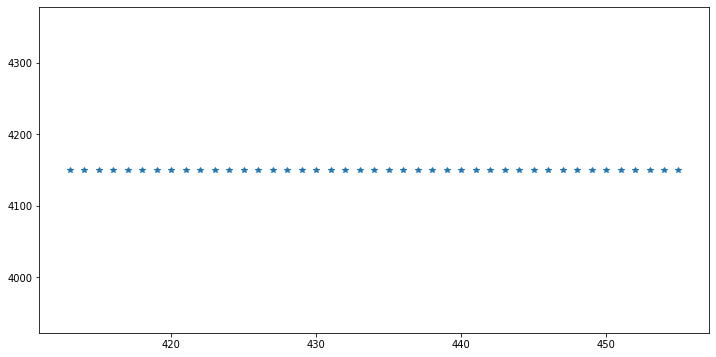

In [26]:
y_pred = clf.predict(x_test)


plt.figure(figsize=(12, 6))
plt.plot(x_test, y_pred,'*',label= 'Set dev train')

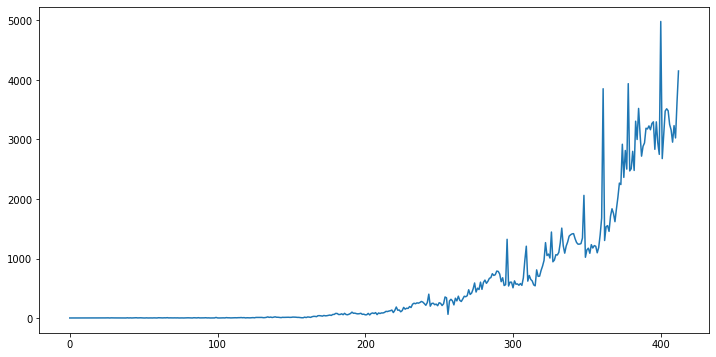

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(x_train, y_train,label= 'Set dev train')

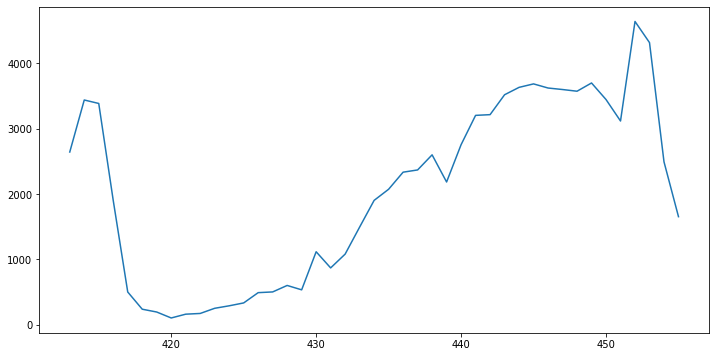

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(x_test, y_test, label= 'Set dev train')

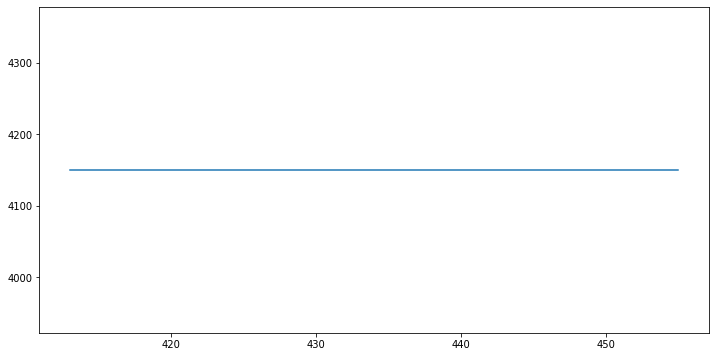

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(x_test, y_pred, label= 'Set dev train')